<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-User-Info" data-toc-modified-id="Get-User-Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get User Info</a></span></li><li><span><a href="#Get-Calendar" data-toc-modified-id="Get-Calendar-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Calendar</a></span></li><li><span><a href="#Get-Streak-Info" data-toc-modified-id="Get-Streak-Info-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Streak Info</a></span></li><li><span><a href="#Get-Leaderboard" data-toc-modified-id="Get-Leaderboard-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get Leaderboard</a></span></li><li><span><a href="#Get-Daily-XP-Progress" data-toc-modified-id="Get-Daily-XP-Progress-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Daily XP Progress</a></span></li><li><span><a href="#Get-Language-Details" data-toc-modified-id="Get-Language-Details-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get Language Details</a></span></li><li><span><a href="#Get-Language-Progress" data-toc-modified-id="Get-Language-Progress-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Get Language Progress</a></span></li><li><span><a href="#Get-Topics" data-toc-modified-id="Get-Topics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Get Topics</a></span></li><li><span><a href="#Get-Words" data-toc-modified-id="Get-Words-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Get Words</a></span></li><li><span><a href="#Get-Learned-Skills" data-toc-modified-id="Get-Learned-Skills-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Get Learned Skills</a></span></li><li><span><a href="#Get-Vocabulary" data-toc-modified-id="Get-Vocabulary-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Get Vocabulary</a></span></li></ul></div>

In [1]:
!pip install duolingo-api


In [47]:
import yaml
import duolingo
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
with open("duo_credentials.yaml", 'r') as stream:
    creds = yaml.safe_load(stream)

lingo  = duolingo.Duolingo(creds['username'], creds['password'])

## Get User Info

In [49]:
lingo.get_user_info()

{'username': 'SejalDua',
 'bio': '',
 'id': 555816886,
 'num_following': None,
 'cohort': None,
 'language_data': {'zs': {'streak': 4,
   'language_string': 'Chinese',
   'level_progress': 127,
   'first_time': False,
   'bonus_rows': [],
   'points_rank': 1,
   'fluency_score': 0.0,
   'push_practice': True,
   'max_section_index': 1,
   'level_tests': [{'index': 0, 'attempts': 3, 'completed': False, 'level': 6},
    {'index': 1, 'attempts': 3, 'completed': False, 'level': 11},
    {'index': 2, 'attempts': 3, 'completed': False, 'level': 18},
    {'index': 3, 'attempts': 3, 'completed': False, 'level': 25},
    {'index': 4, 'attempts': 3, 'completed': False, 'level': 33}],
   'direction_status': 'released',
   'next_level': 6,
   'linkedin_share_url': 'https://www.duolingo.com',
   'notify_practice': True,
   'notifications': {'chrome_app_ad': True,
    'net_promoter': True,
    'schools_2016_07_ad': False},
   'max_cefr_level': None,
   'notify_time': 1140,
   'points_ranking_data': 

## Get Calendar

In [88]:
cal = lingo.get_calendar('zs')
calendar_df = pd.DataFrame.from_records(cal)
calendar_df.sort_values(by='datetime', ascending=False, inplace=True)
calendar_df['datetime'] = calendar_df['datetime'].apply(lambda x: pd.to_datetime(x, unit='ms').date())
calendar_df

,skill_id,improvement,event_type,datetime
20,None,10,practice,2021-09-11
19,None,10,practice,2021-09-11
18,f5c805dd07f07ad0fe4e7c2ecbfe2c33,15,lesson,2021-09-11
17,f5c805dd07f07ad0fe4e7c2ecbfe2c33,15,lesson,2021-09-11
16,f5c805dd07f07ad0fe4e7c2ecbfe2c33,13,lesson,2021-09-11
15,b97078cfaa753dbe61e6e8a0033219c8,15,lesson,2021-09-11
14,b97078cfaa753dbe61e6e8a0033219c8,14,lesson,2021-09-11
13,84c9cb5c4bbc32c9a84fbe4b0b2eaf86,15,lesson,2021-09-10
12,84c9cb5c4bbc32c9a84fbe4b0b2eaf86,14,lesson,2021-09-10
11,84c9cb5c4bbc32c9a84fbe4b0b2eaf86,15,lesson,2021-09-10


<AxesSubplot:xlabel='datetime', ylabel='improvement'>

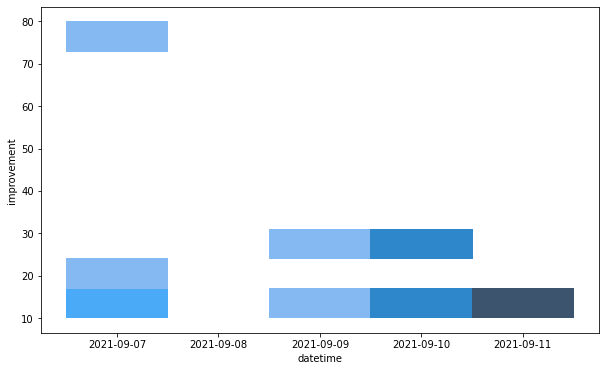

In [123]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=calendar_df, x='datetime', y='improvement', multiple='stack')

## Get Streak Info

In [51]:
lingo.get_streak_info()

{'daily_goal': 20, 'site_streak': 4, 'streak_extended_today': True}

## Get Leaderboard

In [52]:
import time
lingo.get_leaderboard('week', time.time())

[{'points': 427, 'unit': 'week', 'id': 555816886, 'username': 'SejalDua'}]

## Get Daily XP Progress

In [126]:
xp = lingo.get_daily_xp_progress()
xp

{'xp_goal': 20,
 'lessons_today': [{'eventType': 'LESSON',
   'xp': 14,
   'skillId': 'b97078cfaa753dbe61e6e8a0033219c8',
   'time': 1631385702},
  {'eventType': 'LESSON',
   'xp': 15,
   'skillId': 'b97078cfaa753dbe61e6e8a0033219c8',
   'time': 1631385857},
  {'eventType': 'LESSON',
   'xp': 13,
   'skillId': 'f5c805dd07f07ad0fe4e7c2ecbfe2c33',
   'time': 1631386133},
  {'eventType': 'LESSON',
   'xp': 15,
   'skillId': 'f5c805dd07f07ad0fe4e7c2ecbfe2c33',
   'time': 1631386257},
  {'eventType': 'LESSON',
   'xp': 15,
   'skillId': 'f5c805dd07f07ad0fe4e7c2ecbfe2c33',
   'time': 1631386372},
  {'eventType': 'PRACTICE', 'xp': 10, 'skillId': None, 'time': 1631386464},
  {'eventType': 'PRACTICE', 'xp': 10, 'skillId': None, 'time': 1631386605}],
 'xp_today': 92}

In [128]:
xp_df = pd.DataFrame.from_records(xp['lessons_today'])
# calendar_df.sort_values(by='datetime', ascending=False, inplace=True)
# calendar_df['datetime'] = calendar_df['datetime'].apply(lambda x: pd.to_datetime(x, unit='ms').date())
xp_df

,eventType,xp,skillId,time
0,LESSON,14,b97078cfaa753dbe61e6e8a0033219c8,1631385702
1,LESSON,15,b97078cfaa753dbe61e6e8a0033219c8,1631385857
2,LESSON,13,f5c805dd07f07ad0fe4e7c2ecbfe2c33,1631386133
3,LESSON,15,f5c805dd07f07ad0fe4e7c2ecbfe2c33,1631386257
4,LESSON,15,f5c805dd07f07ad0fe4e7c2ecbfe2c33,1631386372
5,PRACTICE,10,None,1631386464
6,PRACTICE,10,None,1631386605


## Get Language Details

In [54]:
lingo.get_language_details('Chinese')

{'streak': 4,
 'language_string': 'Chinese',
 'points': 427,
 'learning': True,
 'language': 'zs',
 'level': 5,
 'current_learning': True,
 'sentences_translated': 0,
 'to_next_level': 23}

## Get Language Progress

In [55]:
lingo.get_language_progress('zs')

{'streak': 4,
 'language_string': 'Chinese',
 'level_progress': 127,
 'num_skills_learned': 12,
 'level_percent': 84,
 'level_points': 150,
 'points_rank': 1,
 'next_level': 6,
 'level_left': 23,
 'language': 'zs',
 'points': 427,
 'fluency_score': 0.0,
 'level': 5}

## Get Topics

In [56]:
print(lingo.get_known_topics('zs'))

['Numbers', 'Occupation', 'Greeting 3', 'Nationality', 'Greeting 1', 'Contact', 'Name', 'Location 1', 'Greeting 2', 'Food 1']


In [57]:
print(lingo.get_unknown_topics('zs'))

['Future', 'Hobbies 2', 'Dining 1', 'Supermarket', 'Drink', 'Travel', 'Work 3', 'Invitiation 1', 'Duo', 'Phrases 2', 'Shopping 4', 'Environment', 'Body Parts', 'Sports 2', 'Hobbies 3', 'Internet Slang', 'Gourmet 2', 'Family 3', 'Exam', 'Location 6', 'Travel 3', 'Communication 2', 'Time 3', 'Invitation 2', 'Time 4', 'Phrases 1', 'Festivals', 'Gourmet 1', 'Daily Routine 2', 'Location 2', 'Food 3', 'House', 'Celebration', 'Daily Routine 1', 'Work 2', 'Languages 3', 'Existence', 'Shopping 1', 'People 1', 'Sports 1', 'Telephone', 'Shopping 2', 'Location 3', 'People 2', 'Shopping 3', 'Health 3', 'Business 2', 'Location 4', 'Travel 2', 'Languages', 'Languages 2', 'Time 1', 'Weather', 'Location 5', 'Personality and Feelings', 'Dining 2', 'Greeting 4', 'Culture', 'Travel 4', 'Emergency', 'Payment', 'Family 1', 'Entertainment', 'Weather 2', 'Health 2', 'Business 1', 'Work', 'Time 2', 'Dining 3', 'Transportation', 'Health 1', 'Daily Routine 3', 'People 3', 'Hobbies 1', 'School 2', 'Restaurant', '

In [58]:
print(lingo.get_reviewable_topics('zs'))

[]


## Get Words

In [59]:
known_words = lingo.get_known_words('zs')
print(known_words)

['纽约', '好', '再见', '明', '中国', '很', '饭', '家', '字', '的', '学生', '儿', '忙', '李', '样', '今', '怎', '三', '上', '怎么样', '美', '电', '少', '十', '九', '你', '认识', '五', '一', '早', '水', '识', '他们', '吗', '生', '喝', '我', '号码', '什么', '香港', '也', '纽', '她', '不', '华', '我们', '兴', '都', '高兴', '叫', '八', '英国', '张', '中', '人', '学', '号', '百', '名', '国', '电话', '哪儿', '吃', '是', '你们', '多', '元', '见', '鱼', '零', '早上', '美国', '多少', '面', '码', '再', '话', '天', '他', '哪', '名字', '七', '北', '认', '茶', '今天', '英', '京', '高', '北京', '在']


## Get Learned Skills

In [60]:
lingo.get_learned_skills('zs')

[{'language_string': 'Chinese',
  'dependencies_name': [],
  'practice_recommended': False,
  'disabled': False,
  'test_count': 3,
  'missing_lessons': 0,
  'skill_progress': {'level': 1},
  'lesson': False,
  'has_explanation': True,
  'url_title': 'Greeting',
  'icon_color': 'green',
  'category': '',
  'num_lessons': 2,
  'strength': 1.0,
  'beginner': True,
  'title': 'Greeting 1',
  'num_levels': 5,
  'coords_y': 1,
  'coords_x': 2,
  'progress_level_session_index': 0,
  'id': '33f1d8ceebf80f5baa5ca305afdcd399',
  'level_sessions_finished': 0,
  'levels_finished': 1,
  'test': True,
  'lesson_number': 1,
  'learned': True,
  'num_translation_nodes': 0,
  'achievements': [],
  'description': '',
  'index': 0,
  'bonus': False,
  'locked': False,
  'explanation': '<p>There are four main tones and one neutral tone in Mandarin Chinese to distinguish words and grammatical uses. </p>\n<table>\n<thead>\n<tr>\n<th>Tone</th>\n<th>Tone mark</th>\n<th>Pronunciation</th>\n</tr>\n</thead>\n<t

## Get Vocabulary

In [70]:
vocab = lingo.get_vocabulary()
vocab

{'language_string': 'Chinese',
 'learning_language': 'zs',
 'from_language': 'en',
 'language_information': {'pronoun_mapping': [], 'tenses': {}},
 'vocab_overview': [{'strength_bars': 4,
   'infinitive': None,
   'normalized_string': 'Shi ',
   'pos': None,
   'last_practiced_ms': 1631386605000,
   'skill': 'Occupation',
   'related_lexemes': [],
   'last_practiced': '2021-09-11T18:56:45Z',
   'strength': 0.99992,
   'skill_url_title': 'Occupation',
   'gender': None,
   'id': '2e8b8cff2dd9dfe6cab932be236f4b7b',
   'lexeme_id': '2e8b8cff2dd9dfe6cab932be236f4b7b',
   'word_string': '是'},
  {'strength_bars': 4,
   'infinitive': None,
   'normalized_string': 'Ren ',
   'pos': None,
   'last_practiced_ms': 1631386605000,
   'skill': 'Nationality',
   'related_lexemes': [],
   'last_practiced': '2021-09-11T18:56:45Z',
   'strength': 0.999862,
   'skill_url_title': 'Nationality',
   'gender': None,
   'id': '44ea0d229d72317f33c778b1cee6169e',
   'lexeme_id': '44ea0d229d72317f33c778b1cee6169

In [129]:
words, strengths = [], []
for word in vocab['vocab_overview']:
    words.append(word['normalized_string'].strip())
    strengths.append(word['strength'])

strengths, words = zip(*sorted(zip(strengths, words)))